In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FixedLocator
from scipy import stats
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv(r"C:\Users\user\PYTHON_JOHN\retails.csv")
df.head(10)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,selling_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,1.5,48.5,-1.5
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,4,0.3,9.7,-0.3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,45.5,864.5,4.5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,0.4,19.6,-0.4
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,5,3.3,106.7,16.7


## UNIVARIATE ANALYSIS

In [5]:
# One variable at a time.

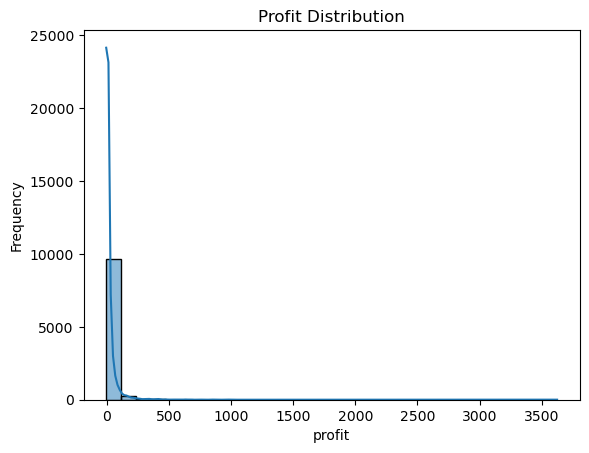

In [6]:
# Distribution of the profit using a histogram
plt.figure
sns.histplot(df['profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.show()

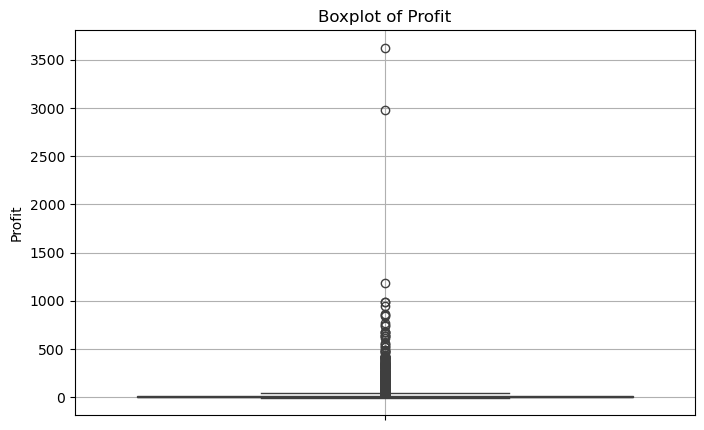

In [7]:
# Distribution of the profit using a boxplot to show the outliers.plt.figure(figsize=(8,5))  # optional: adjust size
plt.figure(figsize=(8,5))
sns.boxplot(y=df['profit'])  # or x=df['Profit'] for horizontal
plt.title('Boxplot of Profit')
plt.ylabel('Profit')
plt.grid(True)
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_7680\4281677941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='pastel')


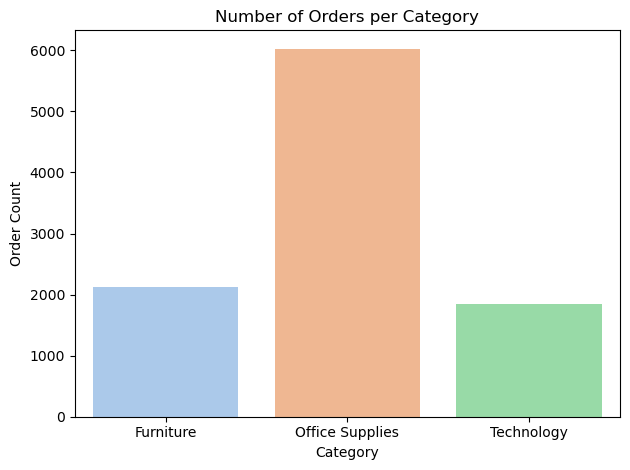

In [8]:
# Number of orders per category
sns.countplot(x='category', data=df, palette='pastel')
plt.title("Number of Orders per Category")
plt.xlabel("Category")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7680\2268005244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ship_mode', data=df, palette='pastel')


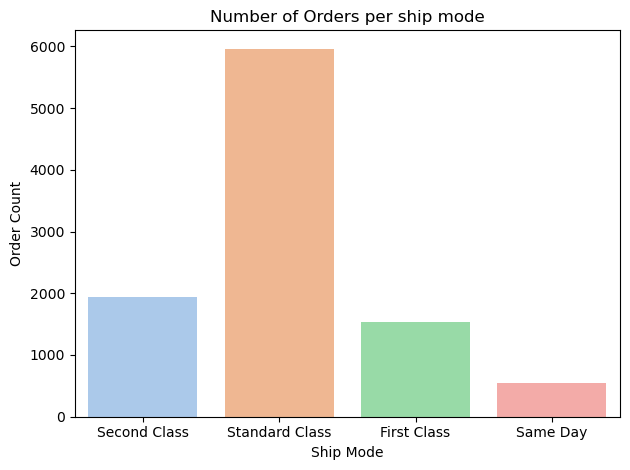

In [9]:
# Number of orders per ship mode
sns.countplot(x='ship_mode', data=df, palette='pastel')
plt.title("Number of Orders per ship mode")
plt.xlabel("Ship Mode")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

##  Bivariate Analysis

In [10]:
# An analysis between two variables

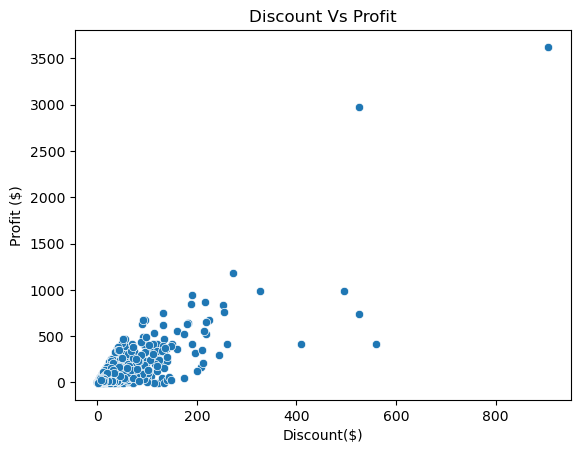

In [11]:
sns.scatterplot(x='discount', y='profit', data=df)
plt.title("Discount Vs Profit")
plt.xlabel("Discount($)")
plt.ylabel("Profit ($)")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7680\2380956081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='profit', data=df, palette='Set2')


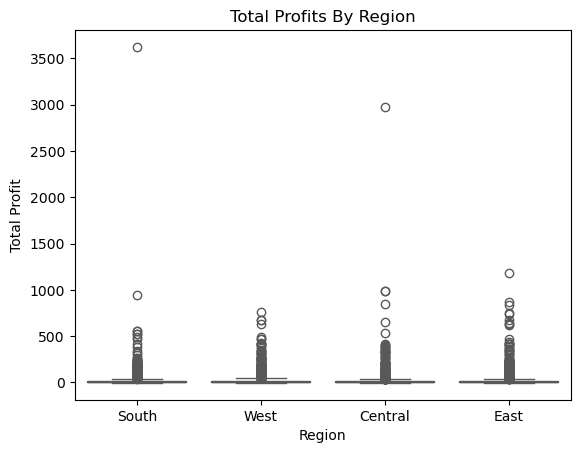

In [12]:
# Box plot to show the total profits by region
sns.boxplot(x='region', y='profit', data=df, palette='Set2')
plt.title("Total Profits By Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()


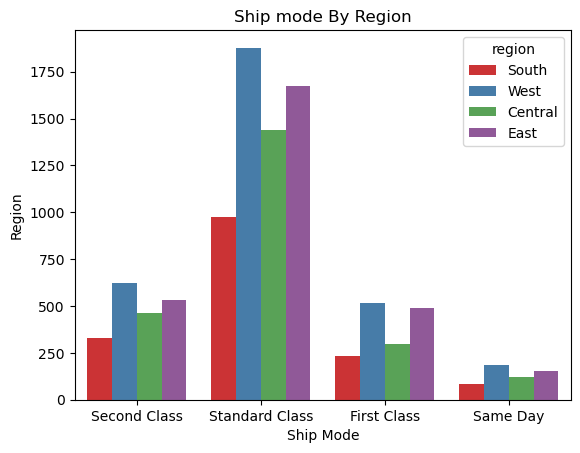

In [13]:
# Grouped Bar Plot to show the ship mode by region
sns.countplot(x='ship_mode', hue='region', data=df, palette='Set1')
plt.title("Ship mode By Region")
plt.xlabel("Ship Mode")
plt.ylabel("Region")
plt.show()


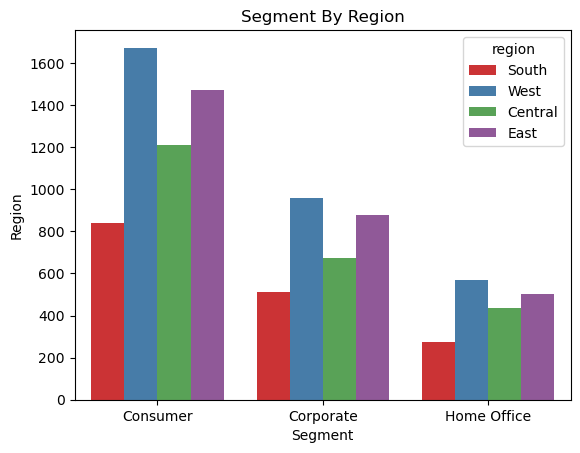

In [14]:
# Grouped Bar Plot to show the segment by region
sns.countplot(x='segment', hue='region', data=df, palette='Set1')
plt.title("Segment By Region")
plt.xlabel("Segment")
plt.ylabel("Region")
plt.show()

##  Multivariate Analysis

In [15]:
# Comparison of three or more variables

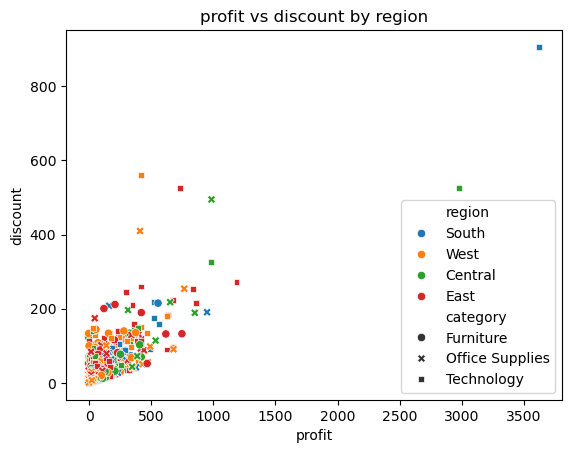

In [16]:
sns.scatterplot(x='profit', y='discount', hue='region', style = 'category',data=df)
plt.title("profit vs discount by region")
plt.show()


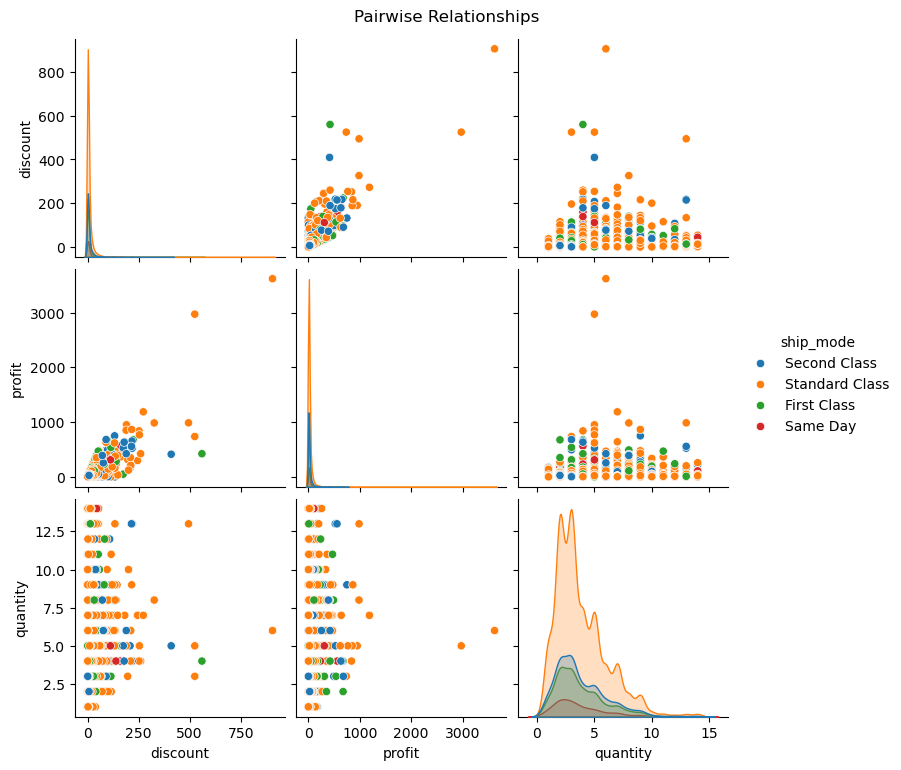

In [17]:
# A pairplot showing the relationships between discount, profit, quantity and the ship mode
sns.pairplot(df[['discount', 'profit', 'quantity', 'ship_mode']], hue='ship_mode')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


## Visualizing Categorical Data : 

In [18]:
# Pie chart : Category Proportions

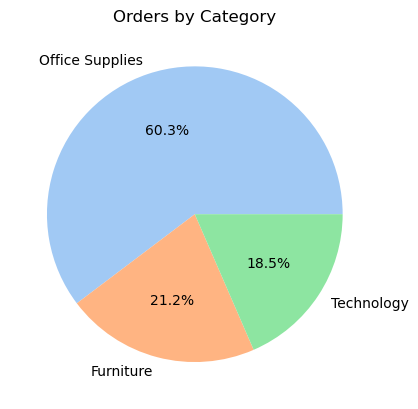

In [19]:
# Using a pie chart 
df['category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Orders by Category")
plt.ylabel("")
plt.show()


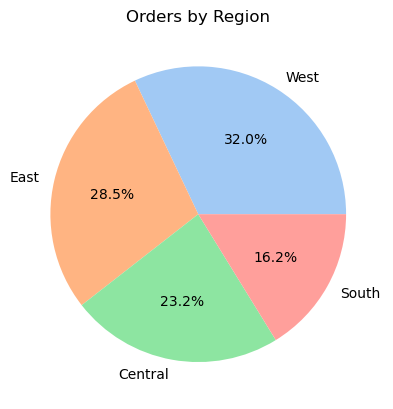

In [20]:
# Using a pie chart to visualize the profit by region
df['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Orders by Region")
plt.ylabel("")
plt.show()


In [21]:
# Violin Plot: Distribution + Density

C:\Users\user\AppData\Local\Temp\ipykernel_7680\1327170083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='segment', y='discount', data=df, palette='muted')


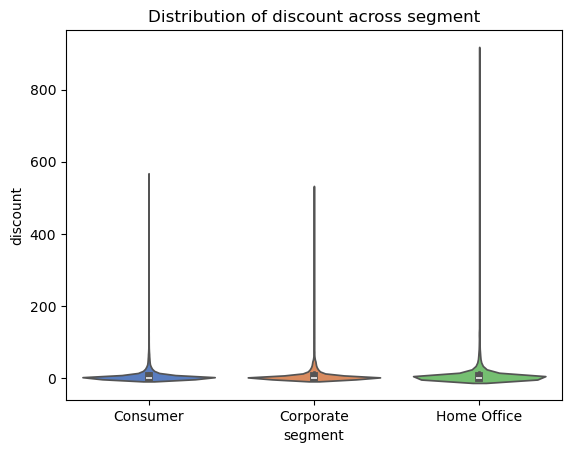

In [22]:
sns.violinplot(x='segment', y='discount', data=df, palette='muted')
plt.title("Distribution of discount across segment")
plt.show()